In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('dataset.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()


,p_1,p_2,target,pred
0,3.60,2.60,0,0
1,4.25,0.95,1,0
2,3.00,1.34,1,0
3,4.07,1.26,1,0
4,3.80,2.71,0,0


In [9]:
def plot_ex(df, name_x1, name_x2, fun):
    x_min, x_max = df[name_x1].min() - .5, df[name_x1].max() + .5
    y_min, y_max = df[name_x2].min() - .5, df[name_x2].max() + .5

    h = .02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = fun(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(7,7))
    plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Pastel1)

    sns.scatterplot(x=df[name_x1], y=df[name_x2], hue=df['target'], palette=['#00aa00','#0000ff'])
    plt.xlabel(name_x1)
    plt.ylabel(name_x2)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks()
    plt.show()
    

In [10]:
#подбираем параметры модели
w1 = 0.2
w2 = 1
b = -3.15

In [11]:
#функция нашей модели
def f(x): 
    return  (1/(1+np.exp(-(w1*x[:,0]+w2*x[:,1] + b)))<=0.5)*1

In [13]:
#делаем предсказание
df['pred'] = f(df[['p_1','p_2']].to_numpy())

<ipython-input-9-e8fe4c5df562>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Pastel1)


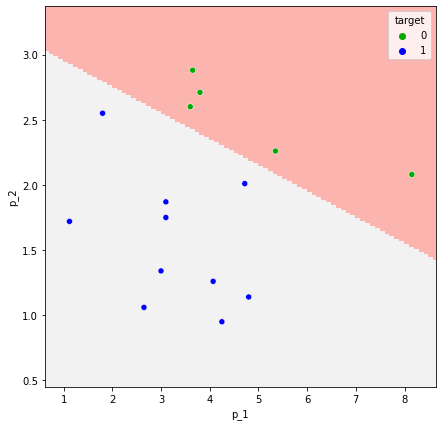

Доля верных ответов: 1.0


,p_1,p_2,target,pred
0,3.60,2.60,0,0
1,4.25,0.95,1,1
2,3.00,1.34,1,1
3,4.07,1.26,1,1
4,3.80,2.71,0,0
5,8.15,2.08,0,0
6,3.10,1.87,1,1
7,3.65,2.88,0,0
8,4.72,2.01,1,1
9,4.80,1.14,1,1


In [14]:
# Нарисуем границу разделения классов и выведем результат предсказания
plot_ex(df, 'p_1', 'p_2', f)
print(f"Доля верных ответов: {sum(df['target'] == df['pred'])/df.shape[0]}")
df